Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg"> Clean version](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/demos/demo10/demo10.ipynb)

[<img src="https://colab.research.google.com/assets/colab-badge.svg"> Modified in class](https://colab.research.google.com/drive/1SK47cU6k9u9iE8LmH5rtDVnz2eIlghDP?usp=sharing)

# Excercise 07 -

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
#Code from Fahmi
#Contribution to Exercise 10

import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import json
!pip install osmnx

In [38]:
!pip install pyproj

In [39]:
os.chdir('/content/drive/Shareddrives/URSP 688Y/Final_Project')

In [40]:
os.listdir()

['Montgomery_County_Boundary.geojson',
 'exercise07_Haoudi_Salma.ipynb',
 'ADU_Dataset_Montgomery (1).csv',
 'metadata.json',
 'ADU_Dataset_Montgomery.geojson',
 'ADU_modified_Dataset_Montgomery.csv',
 'MoCo_data.geojson',
 'large_scale_map.eps',
 'gdf_Montgomery_wgs84.geojson',
 'gdf_montgomery_acc_wgs84 (1).geojson',
 '.ipynb_checkpoints',
 'Copy of metro_stops_montgomery_county.csv',
 'gdf_montgomery_acc_wgs84.geojson',
 'gdf_montgomery_rlu_wgs84 (1).geojson',
 'metro_stops_montgomery_county (1).csv',
 'montgomery_map.html',
 'Presentation',
 'map_with_legend.html',
 'ADU_Dataset_Montgomery.csv',
 'metro_stops_montgomery_county.csv',
 'gdf_montgomery_rlu_wgs84.geojson',
 'gdf_montgomery_acc3_wgs84.geojson',
 'ADU_Mapping_Final.ipynb']

ADU Dataset

In [41]:
df_montgomery = pd.read_csv('/content/drive/Shareddrives/URSP 688Y/Final_Project/ADU_Dataset_Montgomery (1).csv',thousands=',')
df_montgomery.head(7)

ACCT        Steet Name  City    ZIP Licence Type Lic Status    Point X  \
0   332624  Colesville Manor  SILV  20904          ACC         EX  1311838.0   
1  1741671            Friars  BETH  20817          ACC         LI  1274691.0   
2   624230             Elgin  BETH  20817          RLU         AP  1274671.0   
3   277885           Norwood  SILV  20906          RLU         AP  1310651.0   
4    40962           Trundle  DICK  20842          RLU         AP  1179133.0   
5  2158098         Colesberg  SILV  20905          ACC         EX  1318686.0   
6   388328        Berryville  GERM  20874          RLU         AP  1219885.0   

    Point Y  
0  516893.0  
1  489341.0  
2  477097.0  
3  525154.0  
4  542679.0  
5  524881.0  
6  515281.0

In [42]:
license_type_counts = df_montgomery['Licence Type'].value_counts()
print(license_type_counts)

Licence Type
RLU     638
ACC     382
ACC3    135
Name: count, dtype: int64


In [43]:
license_status_counts = df_montgomery['Lic Status'].value_counts()
print(license_status_counts)

Lic Status
AP    568
LI    273
EX    146
PE    144
FC     14
FD     10
Name: count, dtype: int64


In [44]:
df_montgomery_acc = df_montgomery[df_montgomery['Licence Type'].str.contains(('ACC$'))]
df_montgomery_acc3 = df_montgomery[df_montgomery['Licence Type'].str.contains(('ACC3$'))]
df_montgomery_rlu = df_montgomery[df_montgomery['Licence Type'].str.startswith(('RLU'))]

In [45]:
gdf_montgomery_acc = gpd.GeoDataFrame(df_montgomery_acc, geometry=gpd.points_from_xy(df_montgomery_acc['Point X'], df_montgomery_acc['Point Y']), crs='EPSG:2248')
gdf_montgomery_acc3 = gpd.GeoDataFrame(df_montgomery_acc3, geometry=gpd.points_from_xy(df_montgomery_acc3['Point X'], df_montgomery_acc3['Point Y']), crs='EPSG:2248')
gdf_montgomery_rlu = gpd.GeoDataFrame(df_montgomery_rlu, geometry=gpd.points_from_xy(df_montgomery_rlu['Point X'], df_montgomery_rlu['Point Y']), crs='EPSG:2248')


In [46]:
nad83_crs = 'epsg:2248'
wgs84_crs = 'epsg:4326'
gdf_montgomery_acc_wgs84 = gdf_montgomery_acc.to_crs(wgs84_crs)
gdf_montgomery_acc3_wgs84 = gdf_montgomery_acc3.to_crs(wgs84_crs)
gdf_montgomery_rlu_wgs84 = gdf_montgomery_rlu.to_crs(wgs84_crs)

In [47]:
import folium

In [48]:
#montgomery map
montgomery_map = folium.Map(
    location=[39.0, -77.1],
    zoom_start=12.5,
    tiles='cartodbpositron',
    zoom_control=True,
    scrollWheelZoom=False,
    dragging=True
)


In [49]:
gdf_montgomery_acc_wgs84.to_file("/content/drive/Shareddrives/URSP 688Y/Final_Project/ADU_Dataset_Montgomery.csv", driver='GeoJSON')
gdf_montgomery_acc3_wgs84.to_file("/content/drive/Shareddrives/URSP 688Y/Final_Project/gdf_montgomery_acc3_wgs84.geojson", driver='GeoJSON')
gdf_montgomery_rlu_wgs84.to_file("/content/drive/Shareddrives/URSP 688Y/Final_Project/gdf_montgomery_rlu_wgs84.geojson", driver='GeoJSON')

In [50]:
#adding acc ADU units on map
adu_acc_units = gpd.read_file('gdf_montgomery_acc_wgs84.geojson')
circle_marker = folium.CircleMarker(radius = 5, weight = 0.5, color='orange', fillColor = 'orange', fill_opacity=1)
adu_acc_units_points = folium.GeoJson(adu_acc_units.to_json(), marker=circle_marker)
adu_acc_units_points.add_to(montgomery_map)

adu_acc3_units = gpd.read_file('gdf_montgomery_acc3_wgs84.geojson')
circle_marker = folium.CircleMarker(radius = 5, weight = 0.5, color='green', fillColor = 'green', fill_opacity=1)
adu_acc3_units_points = folium.GeoJson(adu_acc3_units.to_json(), marker=circle_marker)
adu_acc3_units_points.add_to(montgomery_map)

adu_rlu_units = gpd.read_file('gdf_montgomery_rlu_wgs84.geojson')
circle_marker = folium.CircleMarker(radius = 5, weight = 0.5, color='blue', fillColor = 'blue', fill_opacity=1)
adu_rlu_units_points = folium.GeoJson(adu_rlu_units.to_json(), marker=circle_marker)
adu_rlu_units_points.add_to(montgomery_map)

In [51]:
#CODE FROM SALMA
#Contribution to Exercise 7

import csv

#Data for the metro stops (I added data manually from coordinates)

data = [
    ['Station', 'Latitude', 'Longitude'],
    ['Rockville', '39.084215', '-77.146424'],
    ['Bethesda', '38.984652', '-77.094709'],
    ['Connecticut Avenue', '38.980640', '-77.100755'],
    ['Lyttonsville', '38.995648', '-77.050056'],
    ['Street-Woodside', '38.991203', '-77.029869'],
    ['Silver Spring', '38.993841', '-77.031321'],
    ['Silver Spring Library', '38.992000', '-77.027498'],
    ['Dale Drive', '38.989300', '-77.026200'],
    ['Manchester Place', '38.987850', '-77.024690'],
    ['Long Branch', '38.990798', '-77.000550'],
    ['Piney Branch Road', '38.9989', '-76.9950'],
    ['Takoma Park', '38.975532', '-77.017834'],
]

# Specify the filename
filename = 'metro_stops_montgomery_county.csv'

# Open the file in write mode
with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the data
    for row in data:
        writer.writerow(row)

print(f"CSV file '{filename}' has been created successfully.")

# File path to your CSV
filename = '/content/drive/Shareddrives/URSP 688Y/Final_Project/metro_stops_montgomery_county.csv'

# Path to the GeoJSON file
geojson_file = '/content/drive/Shareddrives/URSP 688Y/Final_Project/Montgomery_County_Boundary.geojson'

geojson_file2 = '/content/drive/Shareddrives/URSP 688Y/Final_Project/gdf_Montgomery_wgs84.geojson'

# Add Montgomery County GeoJSON to the map
folium.GeoJson(geojson_file, name='Montgomery_County_Boundary').add_to(montgomery_map)


# Read data from the CSV file
with open(filename, mode='r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for station, latitude, longitude in reader:
        latitude, longitude = float(latitude), float(longitude)
        # Create a custom icon (train icon similar to metro icon)
        icon = folium.Icon(color='red', icon='train', prefix='fa')
        # Add a marker with the custom icon for each station
        folium.Marker([latitude, longitude], popup=f"{station}", icon=icon).add_to(montgomery_map)

        # Draw a circle around the station to represent a 15-minute walk area (about 1000 meters)
        folium.Circle(
            location=[latitude, longitude],
            radius=1000,  # radius in meters
            color='red',  # color of the circle's border
            fill=True,     # fill the circle with color
            fill_color='red',  # fill color
            fill_opacity=0.05  # transparency of the fill color
        ).add_to(montgomery_map)

CSV file 'metro_stops_montgomery_county.csv' has been created successfully.


In [52]:
montgomery_map

In [53]:
#CODE FROM SALMA
#Contribution to Exercise 10

from shapely.geometry import Point, shape
import json

# Load the Montgomery County Boundary to use its coordinate system for accurate distance calculation
#with open(geojson_file, 'r') as f:
    #montgomery_boundary = json.load(f)
    #montgomery_shape = shape(montgomery_boundary['features'][0]['geometry'])

# Define data for all stations
data = [
    ['Bethesda', 38.984652, -77.094709],
    ['Connecticut Avenue', 38.980640, -77.100755],
    ['Lyttonsville', 38.995648, -77.050056],
    ['Street-Woodside', 38.991203, -77.029869],
    ['Silver Spring', 38.993841, -77.031321],
    ['Silver Spring Library', 38.992000, -77.027498],
    ['Dale Drive', 38.989300, -77.026200],
    ['Manchester Place', 38.987850, -77.024690],
    ['Long Branch', 38.990798, -77.000550],
    ['Piney Branch Road', 38.9989, -76.9950],
    ['Takoma Park', 38.975532, -77.017834],
]

# Function to calculate distances and filter ADUs within 1000m
def filter_adus_within_distance(adus, point, distance=1000):
    # Convert distance to degrees approximately (1 degree ~ 111 km)
    buffer = point.buffer(distance / 111000)  # buffer in degrees
    nearby_adus = adus[adus.intersects(buffer)]
    return nearby_adus

# Iterate over each station and process ADUs
for station, latitude, longitude in data:
    station_point = Point(longitude, latitude)  # create point object
    nearby_acc = filter_adus_within_distance(adu_acc_units, station_point)
    nearby_acc3 = filter_adus_within_distance(adu_acc3_units, station_point)
    nearby_rlu = filter_adus_within_distance(adu_rlu_units, station_point)

    # Print results for each station
    print(f"{station} - Nearby ACC units: {len(nearby_acc)}")
    print(f"{station} - Nearby ACC3 units: {len(nearby_acc3)}")
    print(f"{station} - Nearby RLU units: {len(nearby_rlu)}")



Bethesda - Nearby ACC units: 2
Bethesda - Nearby ACC3 units: 4
Bethesda - Nearby RLU units: 11
Connecticut Avenue - Nearby ACC units: 2
Connecticut Avenue - Nearby ACC3 units: 0
Connecticut Avenue - Nearby RLU units: 9
Lyttonsville - Nearby ACC units: 1
Lyttonsville - Nearby ACC3 units: 3
Lyttonsville - Nearby RLU units: 2
Street-Woodside - Nearby ACC units: 2
Street-Woodside - Nearby ACC3 units: 3
Street-Woodside - Nearby RLU units: 0
Silver Spring - Nearby ACC units: 2
Silver Spring - Nearby ACC3 units: 2
Silver Spring - Nearby RLU units: 0
Silver Spring Library - Nearby ACC units: 6
Silver Spring Library - Nearby ACC3 units: 4
Silver Spring Library - Nearby RLU units: 0
Dale Drive - Nearby ACC units: 4
Dale Drive - Nearby ACC3 units: 3
Dale Drive - Nearby RLU units: 3
Manchester Place - Nearby ACC units: 6
Manchester Place - Nearby ACC3 units: 3
Manchester Place - Nearby RLU units: 5
Long Branch - Nearby ACC units: 11
Long Branch - Nearby ACC3 units: 1
Long Branch - Nearby RLU units

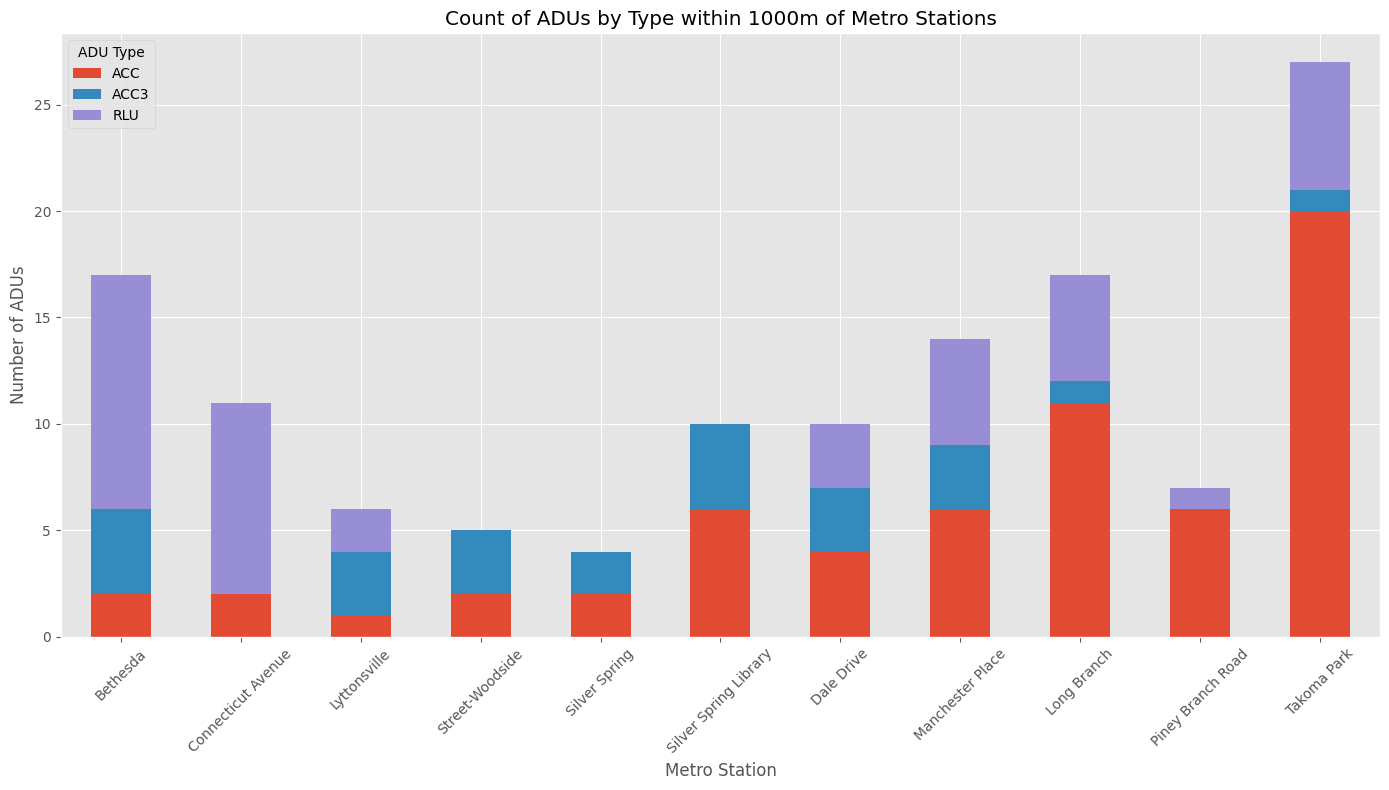

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Data dictionary setup
data = {
    'Station': ['Bethesda', 'Connecticut Avenue', 'Lyttonsville', 'Street-Woodside', 'Silver Spring',
                'Silver Spring Library', 'Dale Drive', 'Manchester Place', 'Long Branch',
                'Piney Branch Road', 'Takoma Park'],
    'ACC': [2, 2, 1, 2, 2, 6, 4, 6, 11, 6, 20],
    'ACC3': [4, 0, 3, 3, 2, 4, 3, 3, 1, 0, 1],
    'RLU': [11, 9, 2, 0, 0, 0, 3, 5, 5, 1, 6]
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Set the style for better aesthetics
plt.style.use('ggplot')

# Create a bar chart
ax = df.set_index('Station').plot(kind='bar', stacked=True, figsize=(14, 8))

# Add titles and labels
plt.title('Count of ADUs by Type within 1000m of Metro Stations')
plt.xlabel('Metro Station')
plt.ylabel('Number of ADUs')
plt.xticks(rotation=45)

# Add legend
plt.legend(title='ADU Type')

# Show the plot
plt.tight_layout()
plt.show()

